## Data Loading

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('New bank_loan_data.xlsx') #Read the excel file
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


## Data Profiling

In [2]:
print("Data type of each column:")
print(df.info())

Data type of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-

We can clearly see that the columns `Gender`, `Income`, `Home Ownership`, and `Online` have missing data.

In [3]:
print(df['Personal Loan'].value_counts(),"\n")
print(df['Online'].value_counts())

Personal Loan
0    4520
1     479
        1
Name: count, dtype: int64 

Online
1.0    2961
0.0    1999
Name: count, dtype: int64


Here, we can clearly see that both <mark>`Personal Loan` and `Online` columns contain only binary value so their data type should be converted to int type</mark>. Also note that one entry in Personal Loan is null string. So, <mark>as both the attributes have null values we cannot convert them to int without cleaning them first</mark>. I also think that <mark>`Mortgage` should be converted to float</mark> as it represents money like `Income`.

In [4]:
print("Summery Statistics:")
print(df.describe(include= 'all'))  #Since, Personal Loan which contains binary values is of object type not int.

Summery Statistics:
                 ID          Age Gender   Experience       Income  \
count   5000.000000  5000.000000   3404  5000.000000  4933.000000   
unique          NaN          NaN      5          NaN          NaN   
top             NaN          NaN      M          NaN          NaN   
freq            NaN          NaN   1677          NaN          NaN   
mean    2500.500000    46.008200    NaN    20.104600    72.758159   
std     1443.520003    25.444898    NaN    11.467954    45.425519   
min        1.000000     0.000000    NaN    -3.000000     8.000000   
25%     1250.750000    35.000000    NaN    10.000000    39.000000   
50%     2500.500000    45.000000    NaN    20.000000    63.000000   
75%     3750.250000    55.000000    NaN    30.000000    95.000000   
max     5000.000000   978.000000    NaN    43.000000   224.000000   

            ZIP Code       Family        CCAvg    Education     Mortgage  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   

In [5]:
df['Gender'].value_counts()

Gender
M    1677
F    1607
O      96
-      21
#       3
Name: count, dtype: int64

Here, the <mark>values `-` and `#` are invalid and these entries must be removed</mark>.

There <mark>may also be some issues in the `Age` and `Experience` columns as the min of 0 and -3 doesn't make sense</mark> for these attributes respectively.

## Data Preprocessing

In [6]:
df.set_index("ID", inplace=True)
df.replace("?", np.nan, inplace=True)
df.replace("", np.nan, inplace=True)
df.replace(" ", np.nan, inplace=True) #For Personal Loan specific case

#For later removal of invalid data in Gender
df['Gender'].replace("-", np.nan, inplace=True)
df['Gender'].replace("#", np.nan, inplace=True)

In [7]:
meanIncome = df['Income'].mean(axis=0)
df['Income'].replace(np.nan, meanIncome, inplace=True)

df.dropna(subset=['Home Ownership', 'Personal Loan', 'Gender','Online'], inplace=True)

Here, I could have dropped Gender and Online column to increase the number of data point about 700, mostly attributed to Gender, but it's said that Gender also plays an important role in Personal Loan approval, even though it shouldn't.

### Checking for nan values

In [8]:
df.isna().any() #Here, `any` evaluates each element to determine if the overall value is True or False.

Age                   False
Gender                False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Home Ownership        False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

### Checking for duplicates

In [9]:
df.duplicated(subset=None).any()

False

In [10]:
df.shape

(3183, 15)

### Correcting data formats

In [11]:
df[['Personal Loan','Online']] = df[['Personal Loan', 'Online']].astype('int') #As both contain only binary data
df[['Mortgage']] = df[['Mortgage']].astype('float') #like income, morgage also deals with money

df.dtypes

Age                     int64
Gender                 object
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage              float64
Home Ownership         object
Personal Loan           int32
Securities Account      int64
CD Account              int64
Online                  int32
CreditCard              int64
dtype: object

### Addressing Logical Anomalies

In [12]:
df[df['Age']<18]

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
79,0,M,30,72.758159,93305,2,2.6,3,0.0,Rent,1,0,0,0,0
91,13,M,30,118.000000,90277,4,5.6,2,0.0,Rent,1,0,0,1,0
1667,2,F,25,190.000000,95138,2,4.2,2,0.0,Rent,1,0,0,1,0
1799,4,M,20,185.000000,94086,3,2.7,1,0.0,Home Mortage,1,0,0,1,0
2216,7,F,3,193.000000,94501,3,4.0,2,0.0,Rent,1,0,0,1,0
2318,8,M,5,129.000000,95814,3,5.9,3,319.0,Rent,1,1,1,0,1


It is common knowledge that an individual must be at least 18 yrs old to get a loan. Looking at the data we can clearly see that the `Age` must be mistaken. How can a 0yr old boy have 30 years of experience.

In [13]:
df[df['Age']<=df['Experience']]

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
79,0,M,30,72.758159,93305,2,2.6,3,0.0,Rent,1,0,0,0,0
91,13,M,30,118.000000,90277,4,5.6,2,0.0,Rent,1,0,0,1,0
1667,2,F,25,190.000000,95138,2,4.2,2,0.0,Rent,1,0,0,1,0
1799,4,M,20,185.000000,94086,3,2.7,1,0.0,Home Mortage,1,0,0,1,0


We can also see that such <mark>mistakes only exist on those entries where the `Age` was below 18. So we must remove these entries</mark>.

In [14]:
df = df[df['Age']>=18]

Similarly, having <mark>-ve years of experience is impossible. So these entries must also be removed</mark>.

In [15]:
df[df['Experience']<0].head()

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
90,25,M,-1,113.0,94303,4,2.30,3,0.0,Rent,0,0,0,0,1
316,24,M,-2,51.0,90630,3,0.30,3,0.0,Rent,0,0,0,1,0
452,28,M,-2,48.0,94132,2,1.75,1,89.0,Home Mortage,0,0,0,1,0
525,24,M,-1,75.0,93014,4,0.20,1,0.0,Home Owner,0,0,0,1,0
541,25,F,-1,109.0,94010,4,2.30,3,314.0,Home Owner,0,0,0,1,0


In [16]:
df = df[df['Experience']>=0]

In [17]:
df

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
1,25,M,1,49.000000,91107,4,1.6,1,0.0,Home Owner,0,1,0,0,0
2,45,M,19,34.000000,90089,3,1.5,1,0.0,Rent,0,1,0,0,0
3,39,M,15,11.000000,94720,1,1.0,1,0.0,Rent,0,0,0,0,0
4,35,M,9,100.000000,94112,1,2.7,2,0.0,Rent,0,0,0,0,0
5,35,M,8,45.000000,91330,4,1.0,2,0.0,Rent,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4884,38,F,13,129.000000,92646,3,4.1,3,0.0,Rent,1,0,1,1,1
4928,43,O,19,72.758159,94720,1,0.7,2,0.0,Rent,1,0,1,1,1
4942,28,F,4,72.758159,90049,2,1.6,2,0.0,Home Mortage,1,0,0,1,0


### Standardization & Normalization
No need to standardize as all related columns i.e. Income, CCAvg and Mortgage are already standardized in terms of thousands. I also didn't feel the need to normalize these data as so that we can cross compare between these columns.

### Handling Outliers

In [18]:
def handleOutlier(column):
  print("\nFor "+column+":")
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3 - q1
  lowerBound = q1 - 1.5 * IQR
  upperBound = q3 + 1.5 * IQR 
  
  outlier_index=[]
  for i in df.index:
    if df[column][i] is not np.nan:
      if (df[column][i] < lowerBound) or (df[column][i] > upperBound):
        outlier_index.append(i)
  
  print("Number of Outliers:",len(outlier_index))
  print("No. of rows before removing outliers",df.shape[0])
  df.drop(outlier_index, inplace=True)
  print("No. of rows after removing outliers",df.shape[0])
  

#### For Age:

<Axes: title={'center': 'Box whisker plot with Outliers'}>

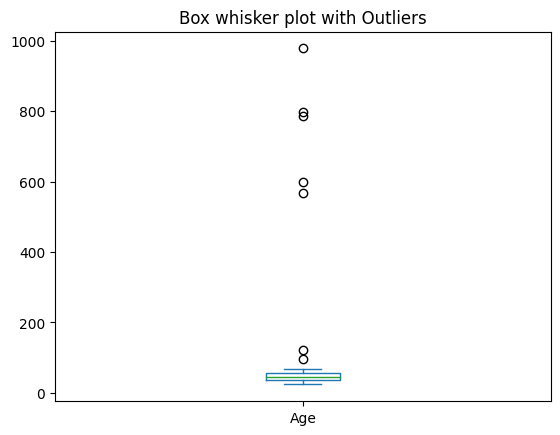

In [19]:
df['Age'].plot(kind='box', title="Box whisker plot with Outliers")

In [20]:
handleOutlier('Age')


For Age:
Number of Outliers: 7
No. of rows before removing outliers 3147
No. of rows after removing outliers 3140


#### For Experience:

<Axes: title={'center': 'Box whisker plot with Outliers'}>

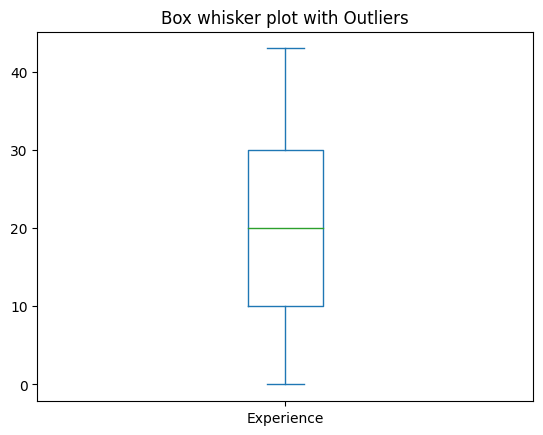

In [21]:
df['Experience'].plot(kind='box', title="Box whisker plot with Outliers")

In [22]:
handleOutlier('Experience')


For Experience:
Number of Outliers: 0
No. of rows before removing outliers 3140
No. of rows after removing outliers 3140


#### For CCAvg:

<Axes: title={'center': 'Box whisker plot with Outliers'}>

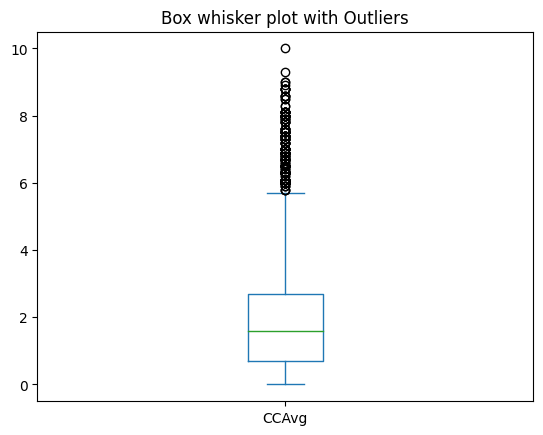

In [23]:
df['CCAvg'].plot(kind='box', title="Box whisker plot with Outliers")

In [24]:
handleOutlier('CCAvg')


For CCAvg:
Number of Outliers: 197
No. of rows before removing outliers 3140
No. of rows after removing outliers 2943


#### For Mortgage:

<Axes: title={'center': 'Box whisker plot with Outliers'}>

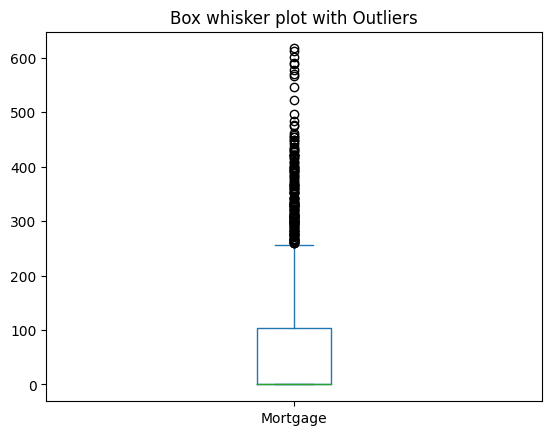

In [25]:
df['Mortgage'].plot(kind='box', title="Box whisker plot with Outliers")

In [26]:
handleOutlier('Mortgage')


For Mortgage:
Number of Outliers: 162
No. of rows before removing outliers 2943
No. of rows after removing outliers 2781


#### For Income:

<Axes: title={'center': 'Box whisker plot with Outliers'}>

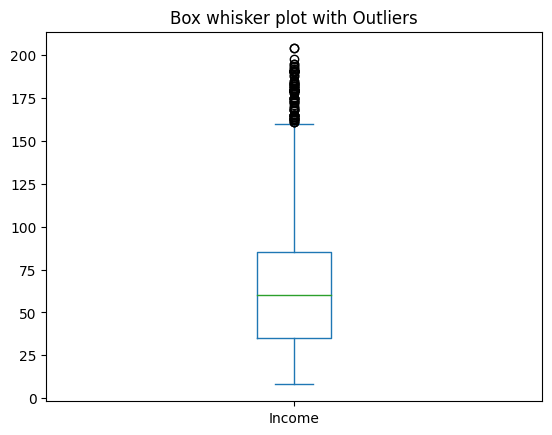

In [27]:
df['Income'].plot(kind='box', title="Box whisker plot with Outliers")

In [28]:
handleOutlier('Income')


For Income:
Number of Outliers: 101
No. of rows before removing outliers 2781
No. of rows after removing outliers 2680


In [29]:
df.shape

(2680, 15)

## Exploratory Data Analysis

In [30]:
df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']].corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.993960,-0.055826,-0.045881,-0.042042,0.054105,-0.015994,0.016307,0.012023,0.010056,0.023634,-0.024899
Experience,0.993960,1.000000,-0.048750,-0.052111,-0.045039,0.026836,-0.015061,0.015211,0.014453,0.011446,0.022923,-0.021490
Income,-0.055826,-0.048750,1.000000,-0.120314,0.542228,-0.158649,-0.041076,0.017770,0.097009,-0.020610,-0.002031,0.415306
Family,-0.045881,-0.052111,-0.120314,1.000000,-0.042910,0.007549,0.022904,0.003527,-0.005234,0.017803,0.013712,0.024979
CCAvg,-0.042042,-0.045039,0.542228,-0.042910,1.000000,-0.052375,-0.012395,0.045797,0.138538,-0.018921,-0.012377,0.409730
Education,0.054105,0.026836,-0.158649,0.007549,-0.052375,1.000000,0.001306,-0.012240,-0.013177,-0.026374,-0.012730,0.105745
Mortgage,-0.015994,-0.015061,-0.041076,0.022904,-0.012395,0.001306,1.000000,0.011639,0.013451,-0.005014,0.001717,-0.020210
Securities Account,0.016307,0.015211,0.017770,0.003527,0.045797,-0.012240,0.011639,1.000000,0.322644,-0.010022,-0.030994,0.038148
CD Account,0.012023,0.014453,0.097009,-0.005234,0.138538,-0.013177,0.013451,0.322644,1.000000,0.161827,0.245873,0.274764
Online,0.010056,0.011446,-0.020610,0.017803,-0.018921,-0.026374,-0.005014,-0.010022,0.161827,1.000000,-0.012327,-0.009976


<mark>Besides **Income, CCAvg, Education and CD Account** the others have a negligible effect on Personal Loan</mark>. The attributes explicitly mentioned here also have the same type of negligible relation with the other unmentioned attributes. So, only the four mentioned attributes are relevant here. 

In [31]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Income vs Personal Loan

In [32]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['Personal Loan'])
print("For Income and Personal Loan:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

For Income and Personal Loan:
The Pearson Correlation Coefficient is 0.41530643124255734  with a P-value of 2.983051734467303e-112


As, P-value is <0.001 correlation of 0.41 between `Income` and `Personal Loan` is highly significant. 

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


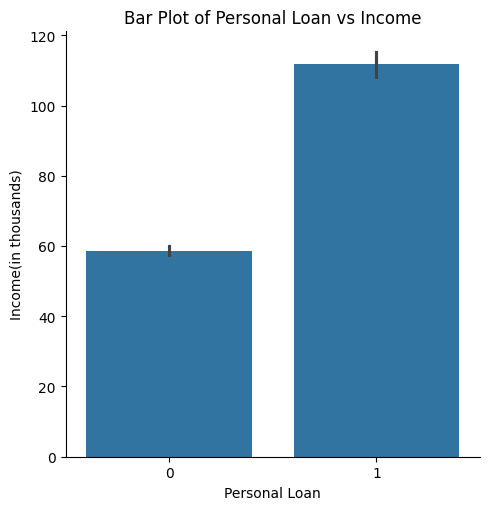

In [33]:
sns.catplot(data=df, x="Personal Loan", y="Income", kind="bar").set(title="Bar Plot of Personal Loan vs Income", ylabel="Income(in thousands)")

We can clearly see in the bar graph that <mark>in average the people who have been approved for Personal loans have almost twice the monthly Income of those who aren't approved</mark>.

### CCAvg vs Personal Loan

In [34]:
pearson_coef, p_value = stats.pearsonr(df['CCAvg'], df['Personal Loan'])
print("For CCAvg and Personal Loan:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

For CCAvg and Personal Loan:
The Pearson Correlation Coefficient is 0.4097297364175141  with a P-value of 5.067299204418516e-109


As, P-value is <0.001 correlation of 0.41 between `CCAvg` and `Personal Loan` is highly significant.

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


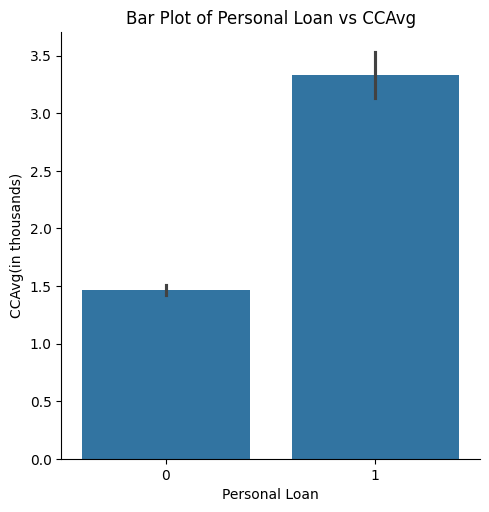

In [35]:
sns.catplot(data=df, x="Personal Loan", y="CCAvg", kind="bar").set(title="Bar Plot of Personal Loan vs CCAvg", ylabel="CCAvg(in thousands)")

We can also see that that <mark>in average the people who have been approved for Personal loans have more that twice the montly Credit Card Expense compared to those who aren't approved</mark>.

#### Income vs CCAvg

In [36]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['CCAvg'])
print("For Income and CCAvg:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

For Income and CCAvg:
The Pearson Correlation Coefficient is 0.5422279130610437  with a P-value of 9.857524612783263e-205


The correlation between Income and CCAvg is positive and as the P-value is <0.001 it is highly significant. This makes sense as peoples expense naturally grows along side their income.

<Axes: title={'center': 'Income vs CCAvg (measured in thousands)'}, xlabel='Income', ylabel='CCAvg'>

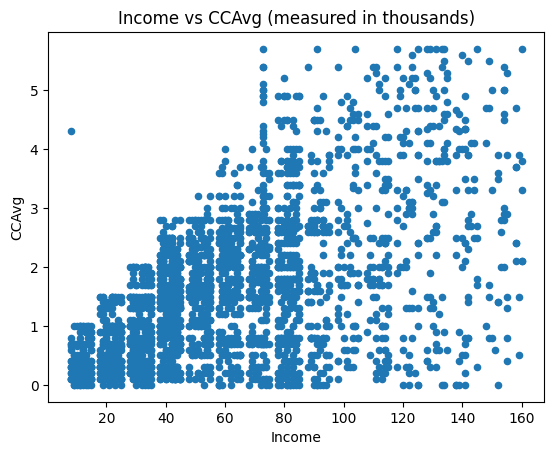

In [37]:
df.plot(kind='scatter', x="Income", y="CCAvg", title="Income vs CCAvg (measured in thousands)")

Here, we can see that <mark>only after crossing the threshold of about 75k in income does peoples CCAvg i.e. credit card expense go above 4.2k. So, the approval of Personal Loan increasing after CCAvg of 4.2k may be due to the crossing this income threshold.</mark>

[Text(0.5, 1.0, 'Residual Plot of Income vs CCAvg (measured in thousands)')]

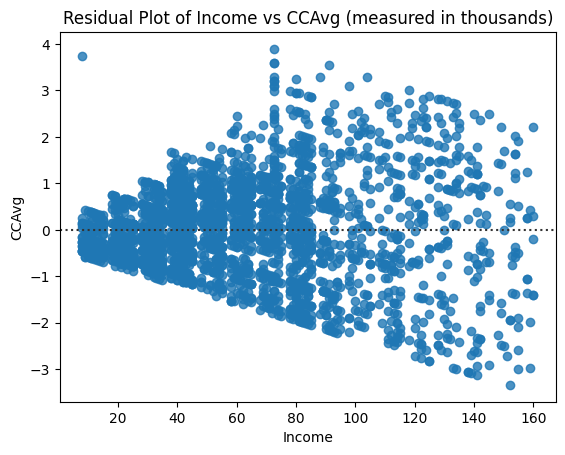

In [38]:
sns.residplot(x=df[['Income']], y=df[['CCAvg']]).set(title="Residual Plot of Income vs CCAvg (measured in thousands)")

As the distribution is not homogeneous, we can say that <mark>Income and CCAvg has curve-linear relationship</mark>.

### Education vs Personal Loan

In [39]:
pearson_coef, p_value = stats.pearsonr(df['Education'], df['Personal Loan'])
print("For Education and Personal Loan:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

For Education and Personal Loan:
The Pearson Correlation Coefficient is 0.10574481657512408  with a P-value of 4.085637726344147e-08


As, P-value is <0.001 correlation of 0.41 between `CCAvg` and `Personal Loan` is highly significant

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


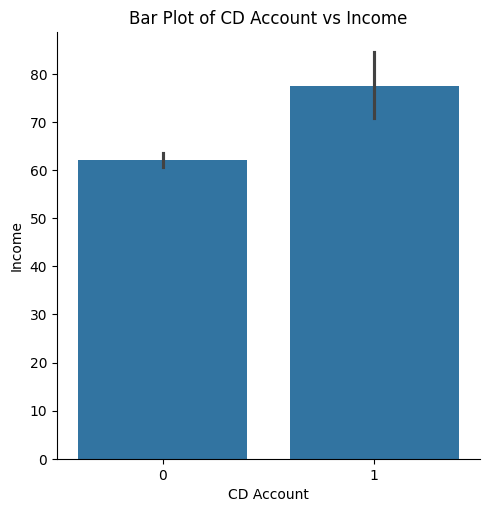

In [40]:
sns.catplot(data=df, x="CD Account", y="Income" , kind="bar").set(title="Bar Plot of CD Account vs Income")

Here, values on the y-axis of the plot (like 0.10) do not represent the actual values of the `Personal Loan` variable. Instead, they represent the proportion of individuals within each category who have taken a personal loan i.e. `Personal Loan`=1.

In [41]:
df['Education'].value_counts()

Education
1    1038
3     834
2     808
Name: count, dtype: int64

We can see that <mark>people who have Masters or Professional Degrees got more personal loans compared to those who had Bachelors degree</mark>, even though people with bachelors degree were the ones who applied for more loans.

#### Education vs Income

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


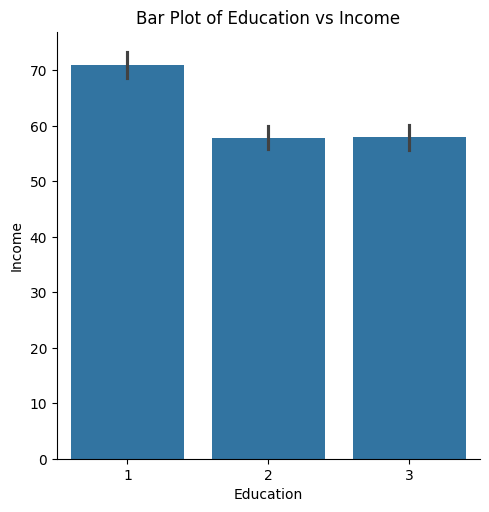

In [42]:
sns.catplot(data=df, x="Education", y="Income" , kind="bar").set(title="Bar Plot of Education vs Income")

We can see that people who have Bachelors Degree earn more in average compared to those with Masters and Professional Degree. But, despite this they have a lower chance of getting Personal Loans. This shows that <mark>Education is factor independent of Income which is essential for predicting acceptance of Personal Loan</mark>.

### CD Account vs Personal Loan

In [43]:
pearson_coef, p_value = stats.pearsonr(df['CD Account'], df['Personal Loan'])
print("For CD Account and Personal Loan:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

For CD Account and Personal Loan:
The Pearson Correlation Coefficient is 0.2747644224380305  with a P-value of 1.256809602856081e-47


As, P-value is <0.001 correlation of 0.27 between `CD Account` and `Personal Loan` is highly significant

In [44]:
df['CD Account'].value_counts()

CD Account
0    2542
1     138
Name: count, dtype: int64

The disparity of entries between two types of CD Accounts is too large. So, it <mark>will distort the Bar plot</mark>. Therefore, we are using violin plot instead. 

##### Violin Plot Fundamentals (General Knowledge)
The reason the plots extend beyond the binary values of 0 and 1 on the y-axis in the upcoming graph is due to the kernel density estimation (KDE) used in violin plots. KDE is a smoothing process that estimates the probability density function of a continuous random variable.

In a violin plot, the KDE can produce tails that extend beyond the actual data range, which is why you see parts of the violins going below 0 and above 1. This is a common visualization effect and does not indicate the presence of actual data points beyond the binary values. It’s simply an artifact of the KDE method used to create the plot. <mark>The width of the violins represents the density of data points at different values, and the extended tails are part of the smoothing process</mark> to give a fuller picture of the data distribution. Remember, the actual data still only contains binary values of 0 or 1 for “Personal Loan.”

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


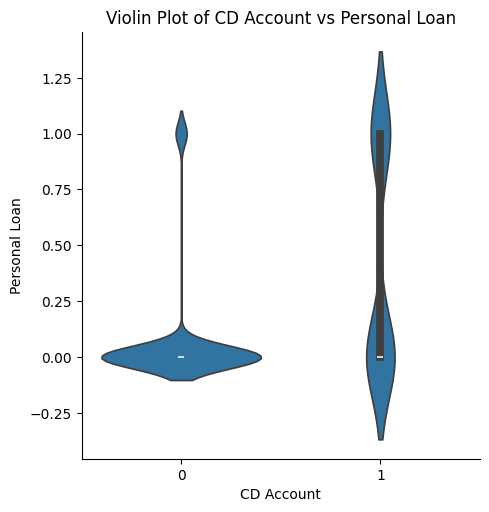

In [45]:
sns.catplot(data=df, x="CD Account", y="Personal Loan", kind="violin").set(title="Violin Plot of CD Account vs Personal Loan")

In [46]:
df[['CD Account','Personal Loan']].value_counts()

CD Account  Personal Loan
0           0                2378
            1                 164
1           0                  82
            1                  56
Name: count, dtype: int64

By just observing the width of the plots at point 0 and 1 only we can see that <mark>most people don't have an CD Account and only a few among them have been granted loan, whereas for the minority who do have a CD Account, about almost **1/4<sup>th</sup> of them have been granted loan**</mark>.

#### CD Account vs Income

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


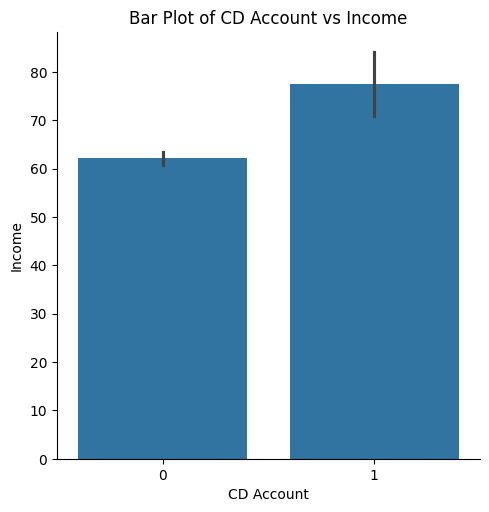

In [47]:
sns.catplot(data=df, x="CD Account", y="Income" , kind="bar").set(title="Bar Plot of CD Account vs Income")

<mark>We can see that people who have a CD Account have a significantly higher income on average. This increase in income may contribute to the higher acceptance of Personal Loan request for those having a CD account.</mark>

In [48]:
df[['Education','CD Account']].value_counts()

Education  CD Account
1          0             984
3          0             797
2          0             761
1          1              54
2          1              47
3          1              37
Name: count, dtype: int64

We can also see that their is not much relation between CD Account and Education. So, <mark>CD account is only influenced by Income and not Education</mark>.

<mark>So, even among the four key attribute i.e. Income, CCAvg, Education and CD Account, there two which have an even more significant impact on Personal Loan. They are **Income** and **Education**</mark> 

Besides these we can also see some other interesting relationships such as:

### Age vs Experience

In [49]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Experience'])
print("For Age and Experience:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

For Age and Experience:
The Pearson Correlation Coefficient is 0.993959554212454  with a P-value of 0.0


<mark>The correlation between Age and Experience is super highly positive and as the P-value is less than 0.001, it is highly significant</mark>. This means that we may use Experience in place of Age and vice-versa. This makes sense as people grow older they will have more work experience.

<Axes: title={'center': 'Age vs Experience in Years'}, xlabel='Age', ylabel='Experience'>

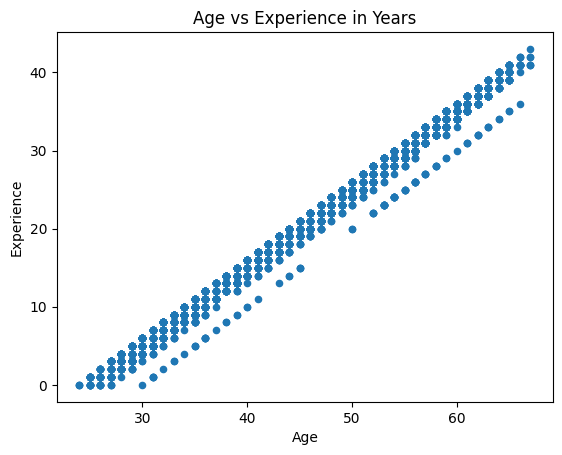

In [50]:
df.plot(kind='scatter', x="Age", y="Experience", title="Age vs Experience in Years")

#### Personal Loan vs Age

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


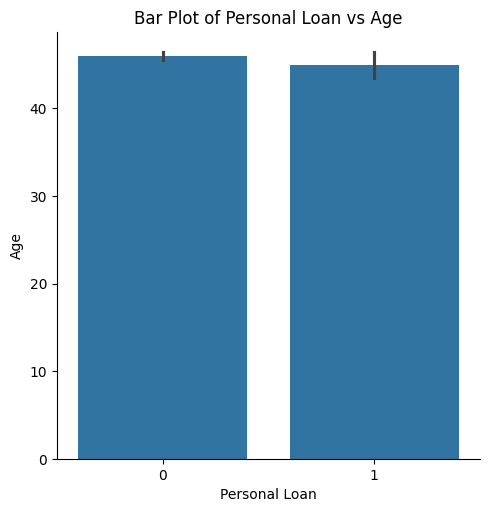

In [51]:
sns.catplot(data=df, x="Personal Loan", y="Age" , kind="bar").set(title="Bar Plot of Personal Loan vs Age")

We can see that <mark>Age and subsequently Experience has no effect on Personal Loan</mark>.

### Home Ownership vs Personal Loan

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


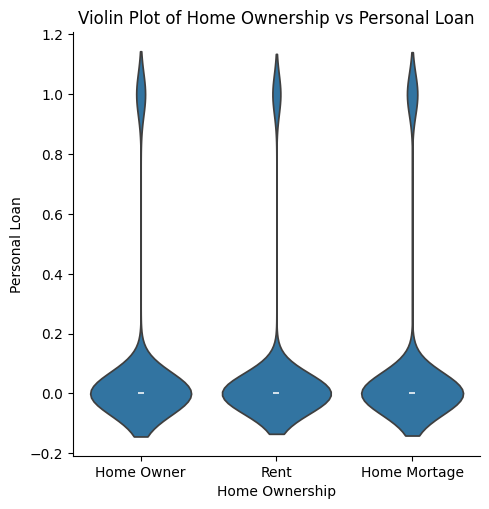

In [52]:
sns.catplot(data=df, x="Home Ownership", y="Personal Loan", kind="violin").set(title="Violin Plot of Home Ownership vs Personal Loan")

In [53]:
df[['Home Ownership','Personal Loan']].value_counts()

Home Ownership  Personal Loan
Home Mortage    0                1067
Home Owner      0                 719
Rent            0                 674
Home Mortage    1                 108
Home Owner      1                  63
Rent            1                  49
Name: count, dtype: int64

<mark>We can see that people who rent are less likely to be approved for personal loans.</mark> Note that a number of home owners of all categories have mortgage. 

### Personal Loan vs Mortgage

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


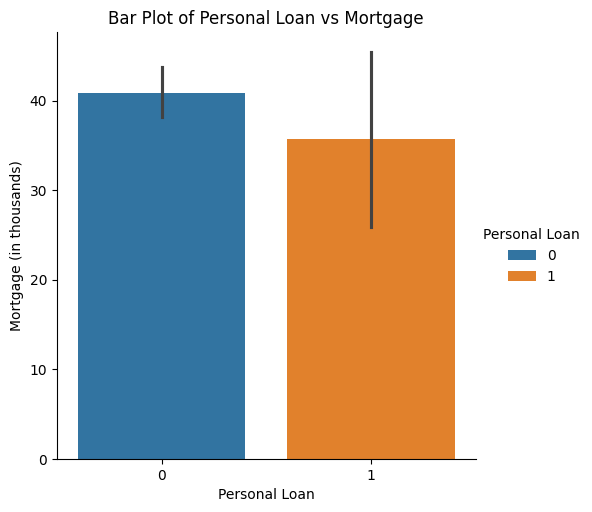

In [54]:
sns.catplot(data=df, x="Personal Loan", y="Mortgage", kind="bar", hue="Personal Loan").set(title="Bar Plot of Personal Loan vs Mortgage", ylabel="Mortgage (in thousands)")

From the graph we can see that <mark>people who have been approved for Personal Loan have less Mortgage</mark>.

#### Mortgage vs Income

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


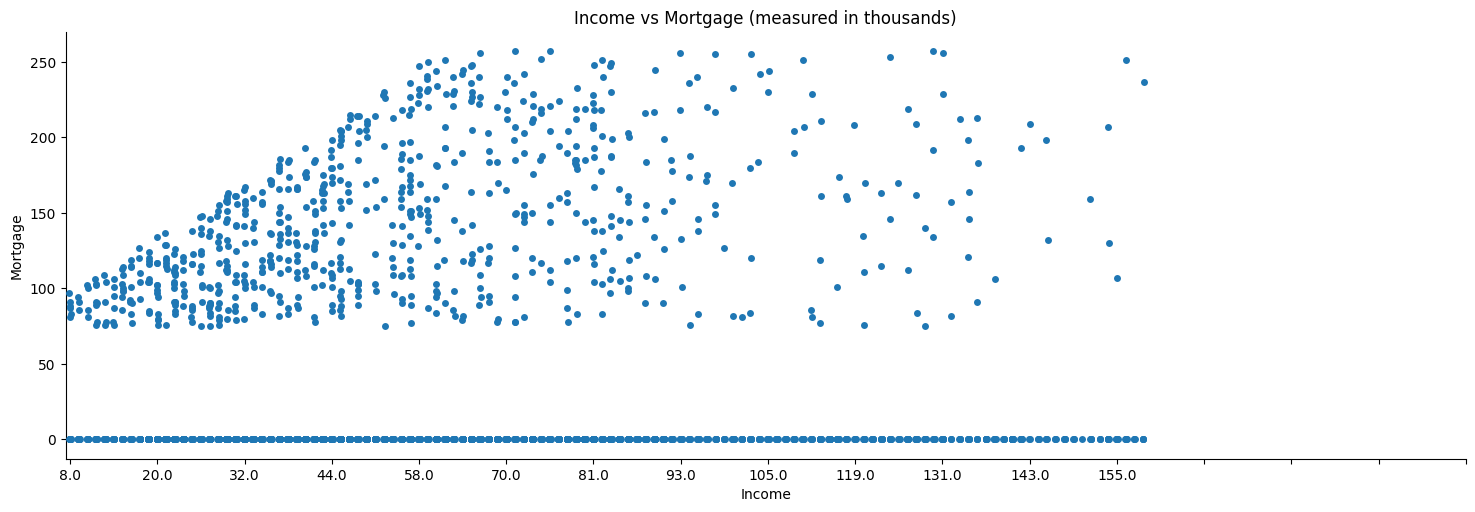

In [55]:
import math
sns.catplot(data=df, x="Income", y="Mortgage",aspect= 3).set(title="Income vs Mortgage (measured in thousands)")
# Set custom x-axis tick locations and labels
plt.xticks(ticks=range(0, math.ceil(max(df['Income']))+1, 10))
plt.show()

From the graph we can tell that they have a curve-linear relation between Mortgage and Income. Mortgages seem to start from about 60k and initially as Income increases so does Mortgage but when we cross income threshold of about 85k the number of people who take Mortgages seems to decline significantly.
So, <mark>the seemingly negative relation between Mortgage & Personal Loan may be due to the curve linear relation between Mortgage & Income where people of income >85k have less Mortgage</mark>.

### Gender vs Personal Loan:

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


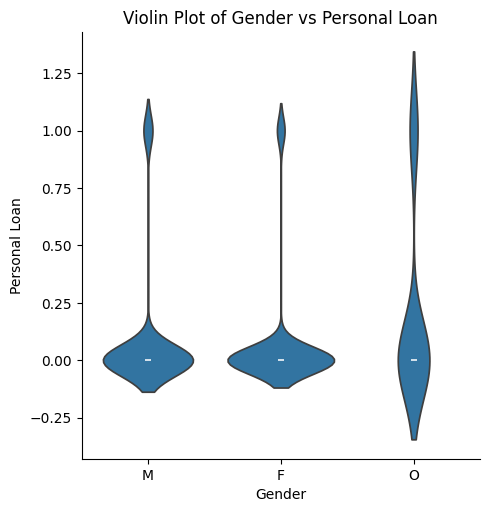

In [56]:
sns.catplot(data=df, x="Gender", y="Personal Loan", kind="violin").set(title="Violin Plot of Gender vs Personal Loan")

In [57]:
df[['Personal Loan','Gender']].value_counts()

Personal Loan  Gender
0              F         1226
               M         1178
1              M          118
               F           88
0              O           56
1              O           14
Name: count, dtype: int64

We can see that 'Other genders' are a fraction of the population compared to males & females but in retrospect have <mark>'Other genders' higher chance of being approved. Males are also seen to have a slight edge over females when getting personal loans</mark>.

#### Gender vs Income

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


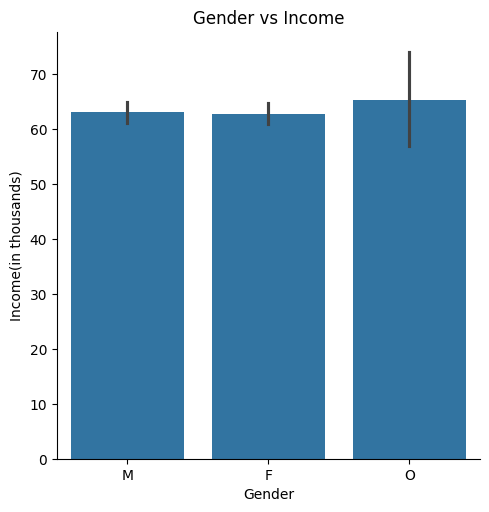

In [58]:
sns.catplot(data=df, x="Gender", y="Income", kind="bar").set(title="Gender vs Income",ylabel="Income(in thousands)")

From this we postulate that <mark>the influence Gender had over Personal Loans may be largely due to their Income distribution</mark>.

### Summary of EDA
##### Two Key Factors:
The two key factors which directly influence Personal Loan are:
1. **Income**, which has a +ve relation with Personal Loan.
2. **Education**, which also has a +ve relation with Personal Loan but is independent of Income.

##### Other Indicators:
1. **CCAvg**, which has +ve relation with Personal Loan mainly due to its curve-linear relation with Income.
2. **CD Account**, which has +ve relation with Personal Loan mainly due to its +ve relation with Income.
3. **Home Ownership**, where people with Rent are less likely to get Personal Loan.
4. **Mortgage**, which has some what -ve relation with Personal Loan mainly due to its curve-linear relation with Income.
5. **Gender**, where chances of getting Personal Loan is in descending order from Others, Males to Females, but its largely due to the subsequent income distribution between these genders. 

## Feature Engineering

In [59]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [60]:
x = df.drop(columns=['Personal Loan', 'ZIP Code']) #Zip Code was deemed irrelevant and Personal Loan is the target variable
x.head()

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,M,1,49.0,4,1.6,1,0.0,Home Owner,1,0,0,0
2,45,M,19,34.0,3,1.5,1,0.0,Rent,1,0,0,0
3,39,M,15,11.0,1,1.0,1,0.0,Rent,0,0,0,0
4,35,M,9,100.0,1,2.7,2,0.0,Rent,0,0,0,0
5,35,M,8,45.0,4,1.0,2,0.0,Rent,0,0,0,1


In [61]:
x = x.values
x[0:5]

array([[25, 'M', 1, 49.0, 4, 1.6, 1, 0.0, 'Home Owner', 1, 0, 0, 0],
       [45, 'M', 19, 34.0, 3, 1.5, 1, 0.0, 'Rent', 1, 0, 0, 0],
       [39, 'M', 15, 11.0, 1, 1.0, 1, 0.0, 'Rent', 0, 0, 0, 0],
       [35, 'M', 9, 100.0, 1, 2.7, 2, 0.0, 'Rent', 0, 0, 0, 0],
       [35, 'M', 8, 45.0, 4, 1.0, 2, 0.0, 'Rent', 0, 0, 0, 1]],
      dtype=object)

### Encoded Labels of Categorical Variables

In [62]:
#For Gender
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['M','F','O'])
x[:,1] = le_gender.transform(x[:,1]) 

#For Home Ownership
le_home_ownership = preprocessing.LabelEncoder()
le_home_ownership.fit(['Home Owner','Home Mortage','Rent'])
x[:,8] = le_home_ownership.transform(x[:,8])

print("Values in x after Label Encoding:")
x[0:5]

Values in x after Label Encoding:


array([[25, 1, 1, 49.0, 4, 1.6, 1, 0.0, 1, 1, 0, 0, 0],
       [45, 1, 19, 34.0, 3, 1.5, 1, 0.0, 2, 1, 0, 0, 0],
       [39, 1, 15, 11.0, 1, 1.0, 1, 0.0, 2, 0, 0, 0, 0],
       [35, 1, 9, 100.0, 1, 2.7, 2, 0.0, 2, 0, 0, 0, 0],
       [35, 1, 8, 45.0, 4, 1.0, 2, 0.0, 2, 0, 0, 0, 1]], dtype=object)

The `preprocessing.LabelEncoder()` encodes categorical values by assigning a unique integer to each category. The categories are sorted alphabetically and then assigned an integer value starting from 0. 

**For Gender:**
<br>F = 0
<br>M = 1
<br>O = 2

**For Home Ownership:**
<br>Home Mortage = 0
<br>Home Owner = 1
<br>Rent = 2

In [63]:
#Loading Target variable
y = df['Personal Loan'].values
y[:5]

array([0, 0, 0, 0, 0])

### Splitting data into Training & Testing sets

In [64]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)
print ('Train set:', x_trainset.shape,  y_trainset.shape)
print ('Test set:', x_testset.shape,  y_testset.shape)

Train set: (1876, 13) (1876,)
Test set: (804, 13) (804,)


## Modeling & Evaluation

In [65]:
from sklearn import metrics
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Confusion matrix plotting function
def plot_confusion_matrix(y,y_predict, title=""):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('{} Confusion Matrix'.format(title)); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

### K nearest neighbor (KNN)

#### Training model on best found parameters

In [66]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 10)

#Training Model
knn_cv.fit(x_trainset, y_trainset)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

#### Evaluation

In [67]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("training accuracy :",knn_cv.best_score_)
knnScore = knn_cv.best_estimator_.score(x_testset, y_testset)
print("test accuracy :",knnScore)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
training accuracy : 0.9275145067698259
test accuracy : 0.9216417910447762


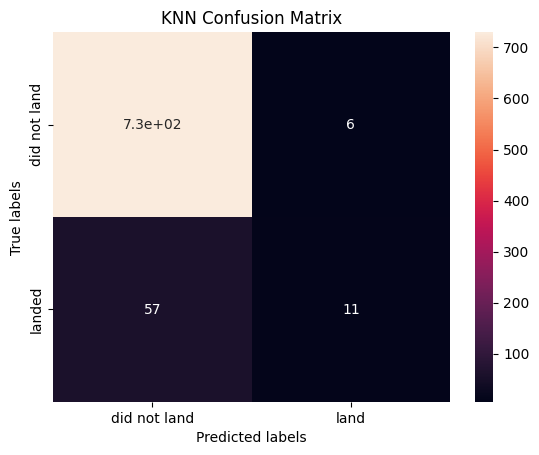

In [68]:
yhat = knn_cv.predict(x_testset)
plot_confusion_matrix(y_testset,yhat, "KNN")

<mark>False negatives seems to be a big problem for this KNN model.</mark>

### Decision Tree

#### Training model on best found parameters

In [72]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree_plot

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 10)

#Training Model
tree_cv.fit(x_trainset,y_trainset)

c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\hakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

#### Evaluation

In [73]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("training accuracy :",tree_cv.best_score_)

treeScore = tree_cv.best_estimator_.score(x_testset, y_testset)
print("test accuracy:",treeScore)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
training accuracy : 0.9568153373535102
test accuracy: 0.9552238805970149


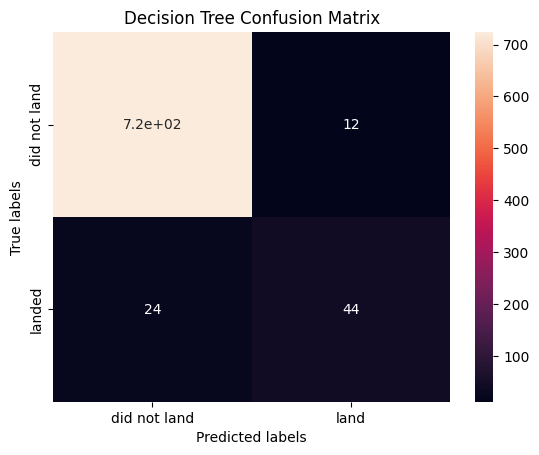

In [74]:
#Predicting
yhat = tree_cv.predict(x_testset)
plot_confusion_matrix(y_testset, yhat, "Decision Tree")

<mark>Here, problem of false negative is substantially lower compared to KNN but the problem of false positive seems to have risen.</mark>

### SVM

#### Training model on best found parameters

In [75]:
# Support Vector Machine classification algorithm
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv = 10)
#Training Model
svm_cv.fit(x_trainset, y_trainset)

#### Evaluation

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("training accuracy :",svm_cv.best_score_)
svmScore = svm_cv.best_estimator_.score(x_testset, y_testset)
print("test accuracy:", svmScore)

In [ ]:
yhat=svm_cv.predict(x_testset)
plot_confusion_matrix(y_testset, yhat, "SVM")

### Logistic Regression

#### Training model on best found parameters

In [ ]:
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)

#Training model
logreg_cv.fit(x_trainset, y_trainset)

#### Evaluation

In [ ]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("training accuracy :", logreg_cv.best_score_)
logregScore = logreg_cv.best_estimator_.score(x_testset, y_testset)  #Accuracy check with best parameters
print("test accuracy:", logregScore)

In [ ]:
yhat=logreg_cv.predict(x_testset)
plot_confusion_matrix(y_testset, yhat, "Logistic Regression")

### Model Comparison

In [ ]:
ml_performance = {
  "Model": ['Logistic Regression', 'SVM', 'Decision Tree', 'K Near Neighbor'],
  "Test Performance": [logregScore, svmScore, treeScore, knnScore]
} 

ml_df = pd.DataFrame(ml_performance)
ml_df